# Metropolis-Hastings sampling with Python

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generate exponential distribution

In [32]:
# Create exponential distribution wih lambda
LAMBDA = 1.5

# Define exponential distribution
def exponential_distribution_pdf(x, lambd):
    """
    Find the PDF of exponential distribution
    :param x: the points to evaluate the PDF
    :param lambd: the parameters of the distribution
    :return: the PDF values evaluated at the points
    """
    if type(x) is np.ndarray:
        return lambd * np.exp(- lambd * x) * (x >= 0)
    return lambd * np.exp(- lambd * x) if x >= 0 else 0


# Define unnormalised exponential distribution
def unnormalised_exponential_distribution_pdf(x, lambd):
    """
    Find the PDF of exponential distribution
    :param x: the points to evaluate the PDF
    :param lambd: the parameters of the distribution
    :return: the PDF values evaluated at the points
    """
    if type(x) is np.ndarray:
        return np.exp(- lambd * x) * (x >= 0)
    return np.exp(- lambd * x) if x >= 0 else 0

# Define normal distribution
def normal_distribution_pdf(x, mean, variance):
    """
    Calculate the PDF of a normal distribution at a point
    :param x: the point to evaluate PDF
    :param mean: the mean of the normal distribution
    :param variance: the variance of the normal distribution
    :return: the PDF
    """
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(- ((x - mean) ** 2) / (2 * variance))

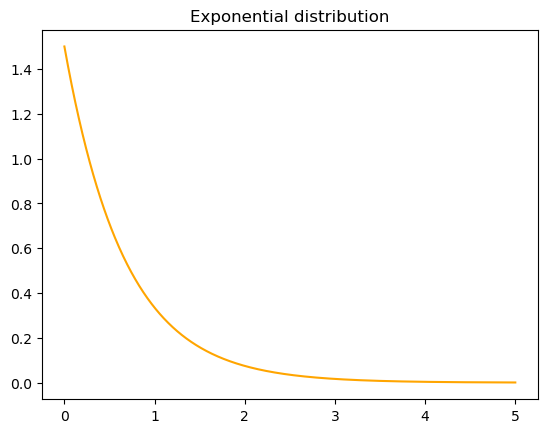

In [33]:
# Plot the distribution
x = np.linspace(0, 5, 1000)
y = exponential_distribution_pdf(x, LAMBDA)
plt.plot(x, y, color='orange')
plt.title('Exponential distribution')
plt.show()

## Metropolis-Hastings algorithm to sample from exponential distribution

In [46]:
# Define parameters
TOTAL_SAMPLES = 100000
STEP_VARIANCE = 2
PROPOSAL_VARIANCE = 1

# Initialize a first state
z = 1

# Start generating samples
samples = []

# Until we have 1000 samples
while len(samples) < TOTAL_SAMPLES:
    # Generate a random sample from normal distribution
    z_sample = np.random.normal(loc=z, scale=np.sqrt(STEP_VARIANCE))
    
    # See if we should reject or accept this value
    a = min(1, (unnormalised_exponential_distribution_pdf(z_sample, LAMBDA) * normal_distribution_pdf(z, z_sample, PROPOSAL_VARIANCE)) 
            / (unnormalised_exponential_distribution_pdf(z, LAMBDA) * normal_distribution_pdf(z_sample, z, PROPOSAL_VARIANCE)))
    
    # See if we accept or reject the same
    uniform_variable = np.random.uniform(low=0, high=1)
    
    # Accept if uniform_variable < a
    # Reject otherwise
    if uniform_variable < a:
        samples.append(z_sample)
        z = z_sample
    else:
        # print('REJECT')
        pass

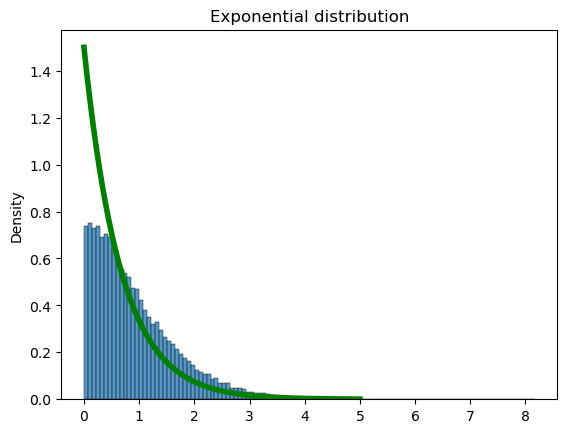

In [48]:
# Create axis
fig, ax = plt.subplots(1, 1)

# Plot the distribution
sns.histplot(samples[::5], stat='density', ax=ax)
x = np.linspace(0, 5, 1000)
pdf_values = LAMBDA * np.exp(-LAMBDA * x)
ax.plot(x, pdf_values, color='green', linewidth=4)
plt.title('Exponential distribution')
plt.savefig('figures/metropolis-hastings-sampling.png')
plt.show()